In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags

In [39]:
#Wave speed
open_depth = 4 #kilometers
coastal_depth = 0.200 #km
gravity = 9.81 #m/s
g = gravity / 1000 #km/s

#alpha = (gravity * depth)**(1/2)

alpha1 = np.sqrt(g*open_depth)
alpha2 = np.sqrt(g*coastal_depth)

L = 30 #km 
xt = 10 #continental shelf is 10km out
tf = 100.0

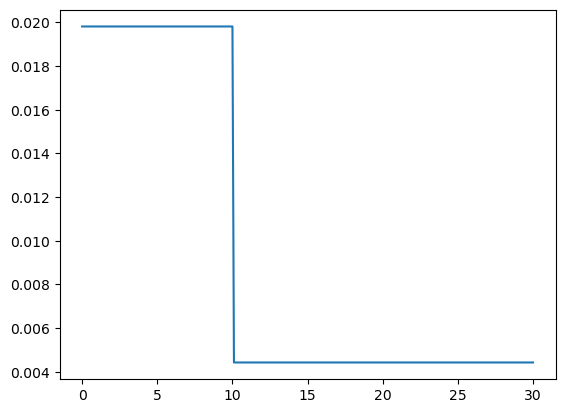

In [40]:
nx = 301
nt = 10000

x = np.linspace(0,L,nx)
t = np.linspace(0,tf,nt)

dt = t[1]-t[0]
dx = x[1]-x[0]

#constant wave speed
lam = alpha1 *dt /dx

#changing wave speed
lam = np.zeros(nx)
lam[x<=xt] = alpha1*dt/dx
lam[x>xt] = alpha2*dt/dx

plt.plot(x,lam)

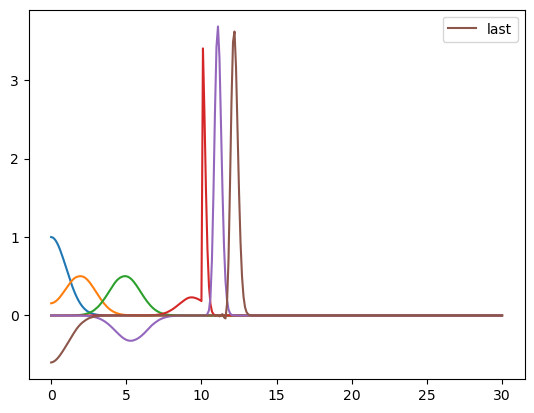

In [44]:
u = np.nan*np.ones([nx,nt])
u[:,0] = np.exp(-(x**2) / 2) #initializing first two time steps cux we have k-1
u[:,1] = np.exp(-(x**2) / 2)

data = np.array([(lam**2)*np.ones(nx), 2*(1-lam**2)*np.ones(nx), (lam**2)*np.ones(nx)])
diags = np.array([-1, 0, 1])
M = spdiags(data, diags, nx, nx).toarray()

#Reflective BC
M[0,0] = 2-lam[0]**2
M[-1,-1] = 2-lam[-1]**2

for k in np.arange(nt-2):
    u[:,k+2] = np.matmul(M,u[:,k+1]) - u[:,k]
    
plt.plot(x, u[:,0])
plt.plot(x, u[:,1000])
plt.plot(x, u[:,2500])
plt.plot(x, u[:,5000])
plt.plot(x, u[:,7500])
plt.plot(x, u[:,-1],label='last')
plt.legend()